In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats

## Сначала посмотрим на сами данные

В силу большого объема данных я взял только некоторую часть, 

чтобы сильно не грузить свою локальную машину (у меня ядро просто падало при обработке всего датасета),

и не делать докер-образ в CI слишком тяжелым (на этапе рендеринга и публикации в gitlab pages).

In [2]:
thrd = 10000

In [3]:
data = pd.read_csv("../data/2015-street-tree-census-tree-data.csv", nrows=thrd)
data.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common  ...  \
0  Alive   Fair                         Acer rubrum        red maple  ...   
1  Alive   Fair                   Quercus palustris          pin oak  ...   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
4  Alive   Good                     Tilia americana  American linden  ...   

   boro_ct     state   latitude  longitude         x_sp         y_sp  \
0  4073900  New York  40.723092 -73.844215  1027431.148  202756.7687   
1  4097300  New York  40.794111 -73.818679  1034455.701  228644.8374   
2  3044900  New York  40.717581 -73.936608  1001822.831  200716.8913   
3  3044900  New York  40.713537 -73.934456  1002420.358  199244.2531   
4  3016500  New York  40.666778 -73.975979   990913.775  182202.4260   

  council district census tract        bin           bbl  
0             29.0        739.0  4052307.0  4.022210e+09  
1             19.0        973.0  4101931.0  4.044750e+09  
2             34.0        449.0  3338310.0  3.028870e+09  
3             34.0        449.0  3338342.0  3.029250e+09  
4             39.0        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

In [4]:
len(data)

10000

In [5]:
data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

## Посмотрим на пропущенные значения

In [6]:
data.isna().sum()

tree_id                0
block_id               0
created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health               609
spc_latin            609
spc_common           609
steward             6732
guards              8225
sidewalk             609
user_type              0
problems            5931
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
x_sp                   0


In [7]:
fig = px.pie(data, names=data["health"], title="Pie Chart.")

fig.show()

In [8]:
fig = px.pie(data, names=data["guards"], title="Pie Chart.")

fig.show()

In [9]:
fig = px.pie(data, names=data["steward"], title="Pie Chart.")

fig.show()

**Вывод:** Видим, что в столбцах `guard` и `steward` довольно много пропущенных значений.

## Посмотрим на распределение некоторых категориальных фичей

In [10]:
some_cat_cols = [
    "curb_loc",
    "status",
    "health",
    "spc_latin",
    "spc_common",
    "guards",
    "sidewalk",
    "user_type",
    "problems",
    "address",
    "borough",
]

In [11]:
for col in some_cat_cols:
    print(data[col].value_counts())
    print()

curb_loc
OnCurb            9471
OffsetFromCurb     529
Name: count, dtype: int64

status
Alive    9391
Stump     338
Dead      271
Name: count, dtype: int64

health
Good    6918
Fair    1936
Poor     537
Name: count, dtype: int64

spc_latin
Gleditsia triacanthos var. inermis    1035
Platanus x acerifolia                  961
Quercus palustris                      915
Pyrus calleryana                       612
Acer platanoides                       609
                                      ... 
Larix laricina                           1
Acer negundo                             1
Magnolia acuminata                       1
Cedrus deodara                           1
Maclura pomifera                         1
Name: count, Length: 109, dtype: int64

spc_common
honeylocust          1035
London planetree      961
pin oak               915
Callery pear          612
Norway maple          609
                     ... 
American larch          1
boxelder                1
cucumber magnolia       1
H

## Посмотрим на распределение численных признаков

In [12]:
num_cols = ["tree_dbh", "stump_diam", "latitude", "longitude", "x_sp", "y_sp"]

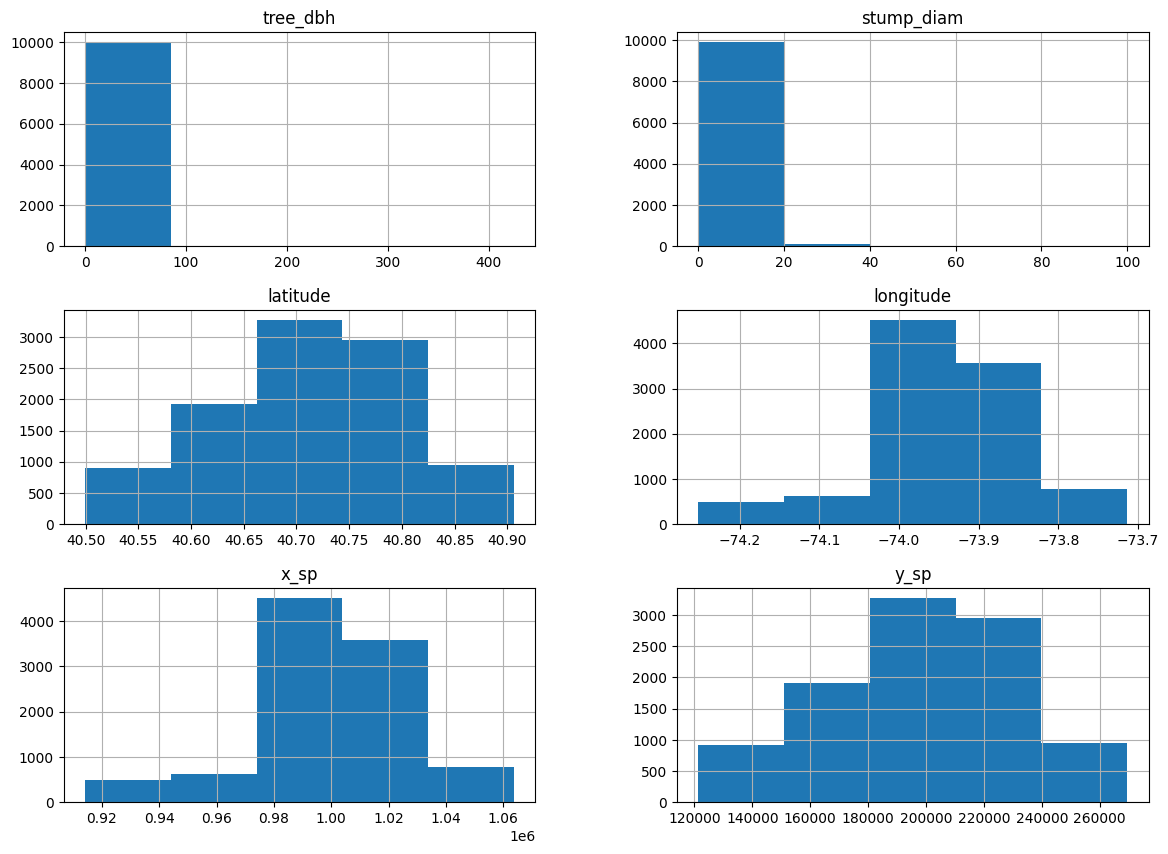

In [13]:
data.hist(column=num_cols, bins=5, figsize=(14, 10))
None

### Посмотрим диаграммы попарного распределения численных признаков

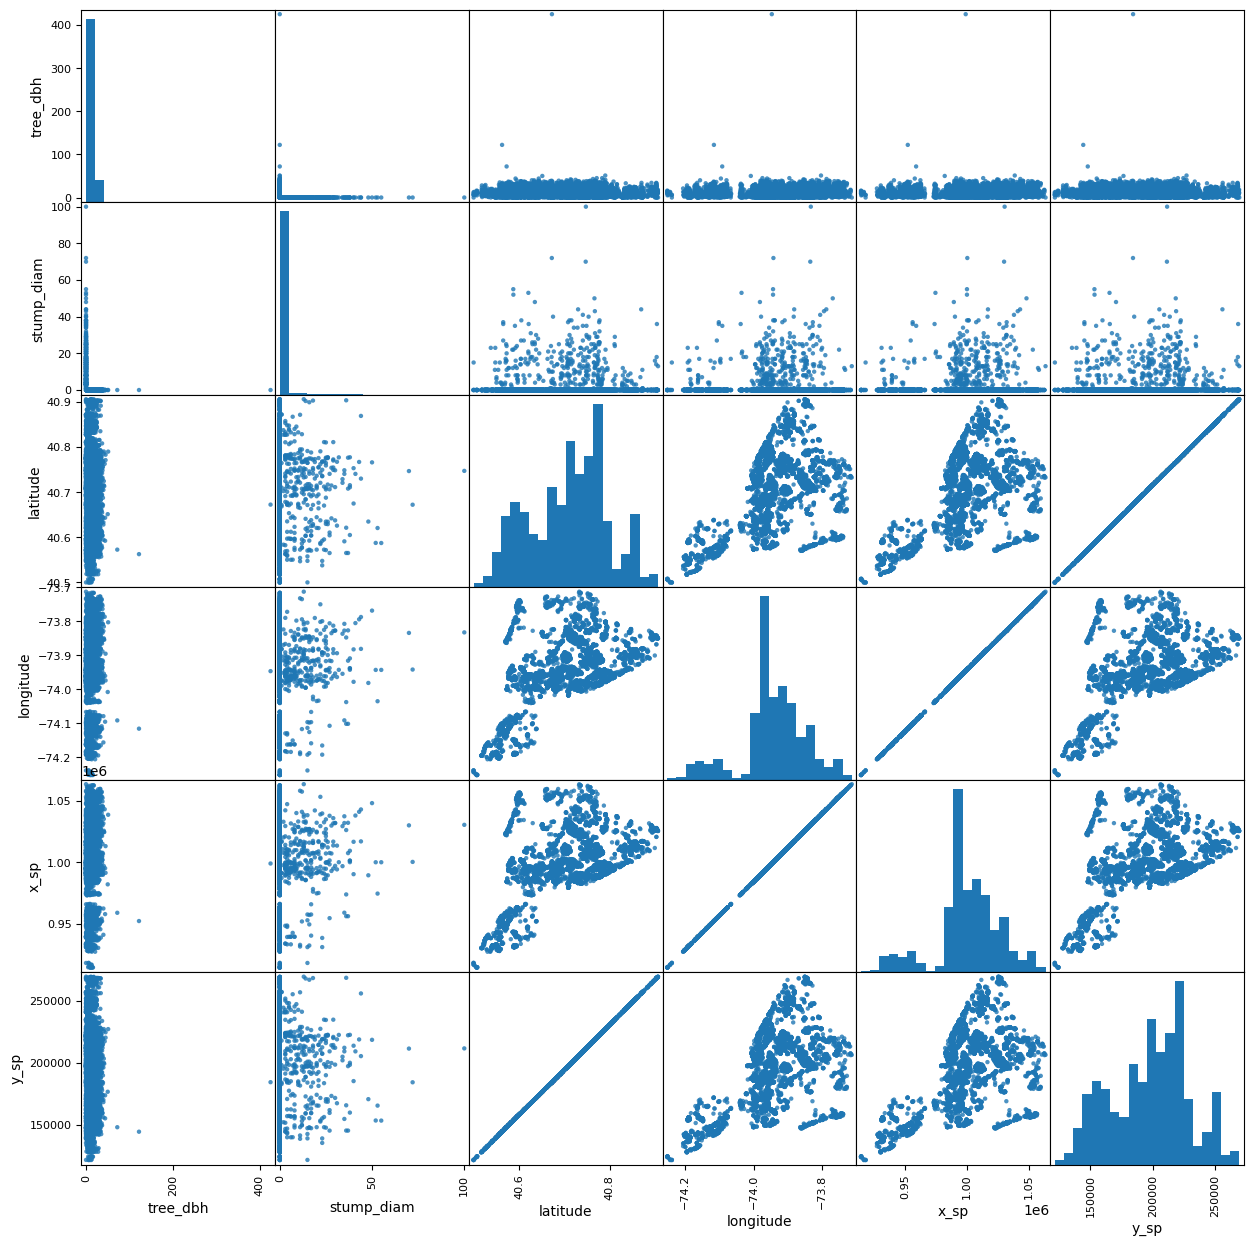

In [14]:
pd.plotting.scatter_matrix(
    data[num_cols],
    figsize=(15, 15),
    marker="o",
    hist_kwds={"bins": 20},
    s=10,
    alpha=0.8,
)
None

Как и ожидалось, мы видим прямую зависимость между `longitude` и `x_sp`, а также `latitude` и `y_sp`.

### Рассчитаем и посмотрим матрицу попарных корреляций между численными признаками

In [15]:
data[num_cols].corr().style.background_gradient(cmap="coolwarm")

Опять же, как и должно быть, имеется полная корреляция между `longitude` и `x_sp`, а также `latitude` и `y_sp`.

Также присутствуют некоторая корреляция этих признаков друг с другом.

## Отобразим географическое представление деревьев из датасета

In [33]:
latitudes = data.latitude.tolist()

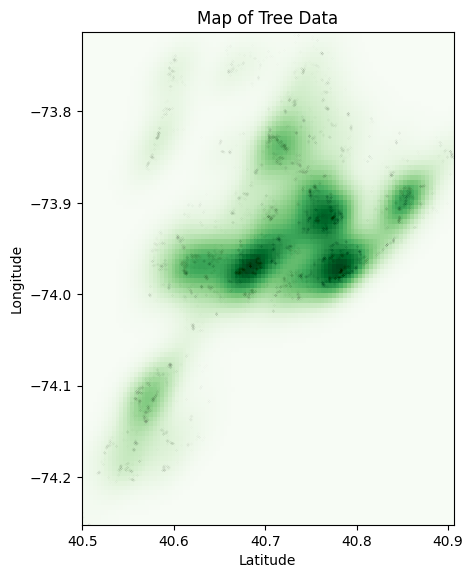

In [6]:
latitudes = data.latitude.tolist()
longitudes = data.longitude.tolist()
xmin, xmax = min(latitudes), max(latitudes)
ymin, ymax = min(longitudes), max(longitudes)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([latitudes, longitudes])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig = plt.figure()
fig.set_size_inches(30, fig.get_figwidth(), forward=True)
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.Greens, extent=[xmin, xmax, ymin, ymax])
ax.plot(latitudes, longitudes, "k.", markersize=0.02)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title("Map of Tree Data")
plt.show()